<a href="https://colab.research.google.com/github/williamdavidona/MachineLearning-SupervisedLearning/blob/main/XGBoost_vs_Random_Forest_vs_Decision_Tree_World_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#World Optimization
Name:William Ona


#Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [3]:
# import dataset
data = pd.read_csv('Train-Set.csv')
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.select_dtypes(include='object').nunique()

ProductID       1559
FatContent         5
ProductType       16
OutletID          10
OutletSize         3
LocationType       3
OutletType         4
dtype: int64

In [6]:
data.drop(columns='ProductID', inplace=True)
data.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             7060 non-null   float64
 1   FatContent         8523 non-null   object 
 2   ProductVisibility  8523 non-null   float64
 3   ProductType        8523 non-null   object 
 4   MRP                8523 non-null   float64
 5   OutletID           8523 non-null   object 
 6   EstablishmentYear  8523 non-null   int64  
 7   OutletSize         6113 non-null   object 
 8   LocationType       8523 non-null   object 
 9   OutletType         8523 non-null   object 
 10  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


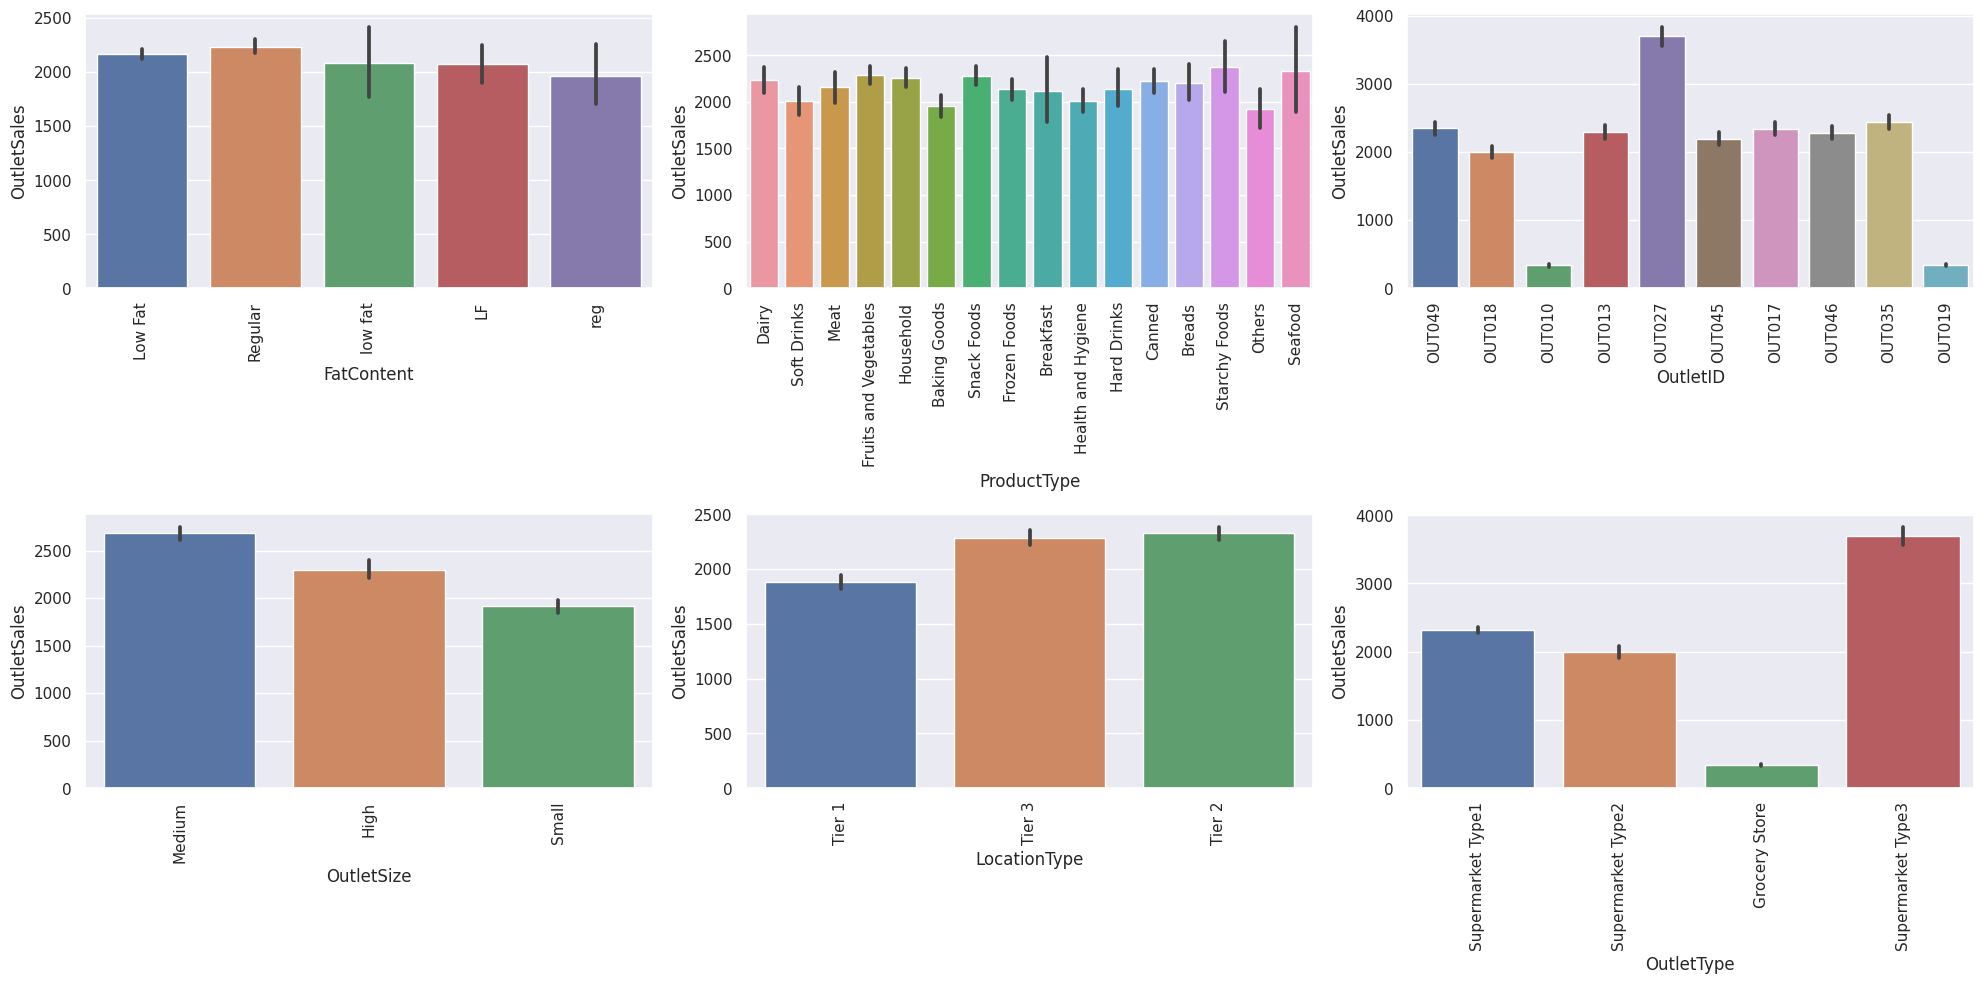

In [8]:
cat_vars = ['FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType', 'OutletType']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()
for i, var in enumerate(cat_vars):
  sns.barplot(x=var, y='OutletSales', data= data, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()


TypeError: ignored

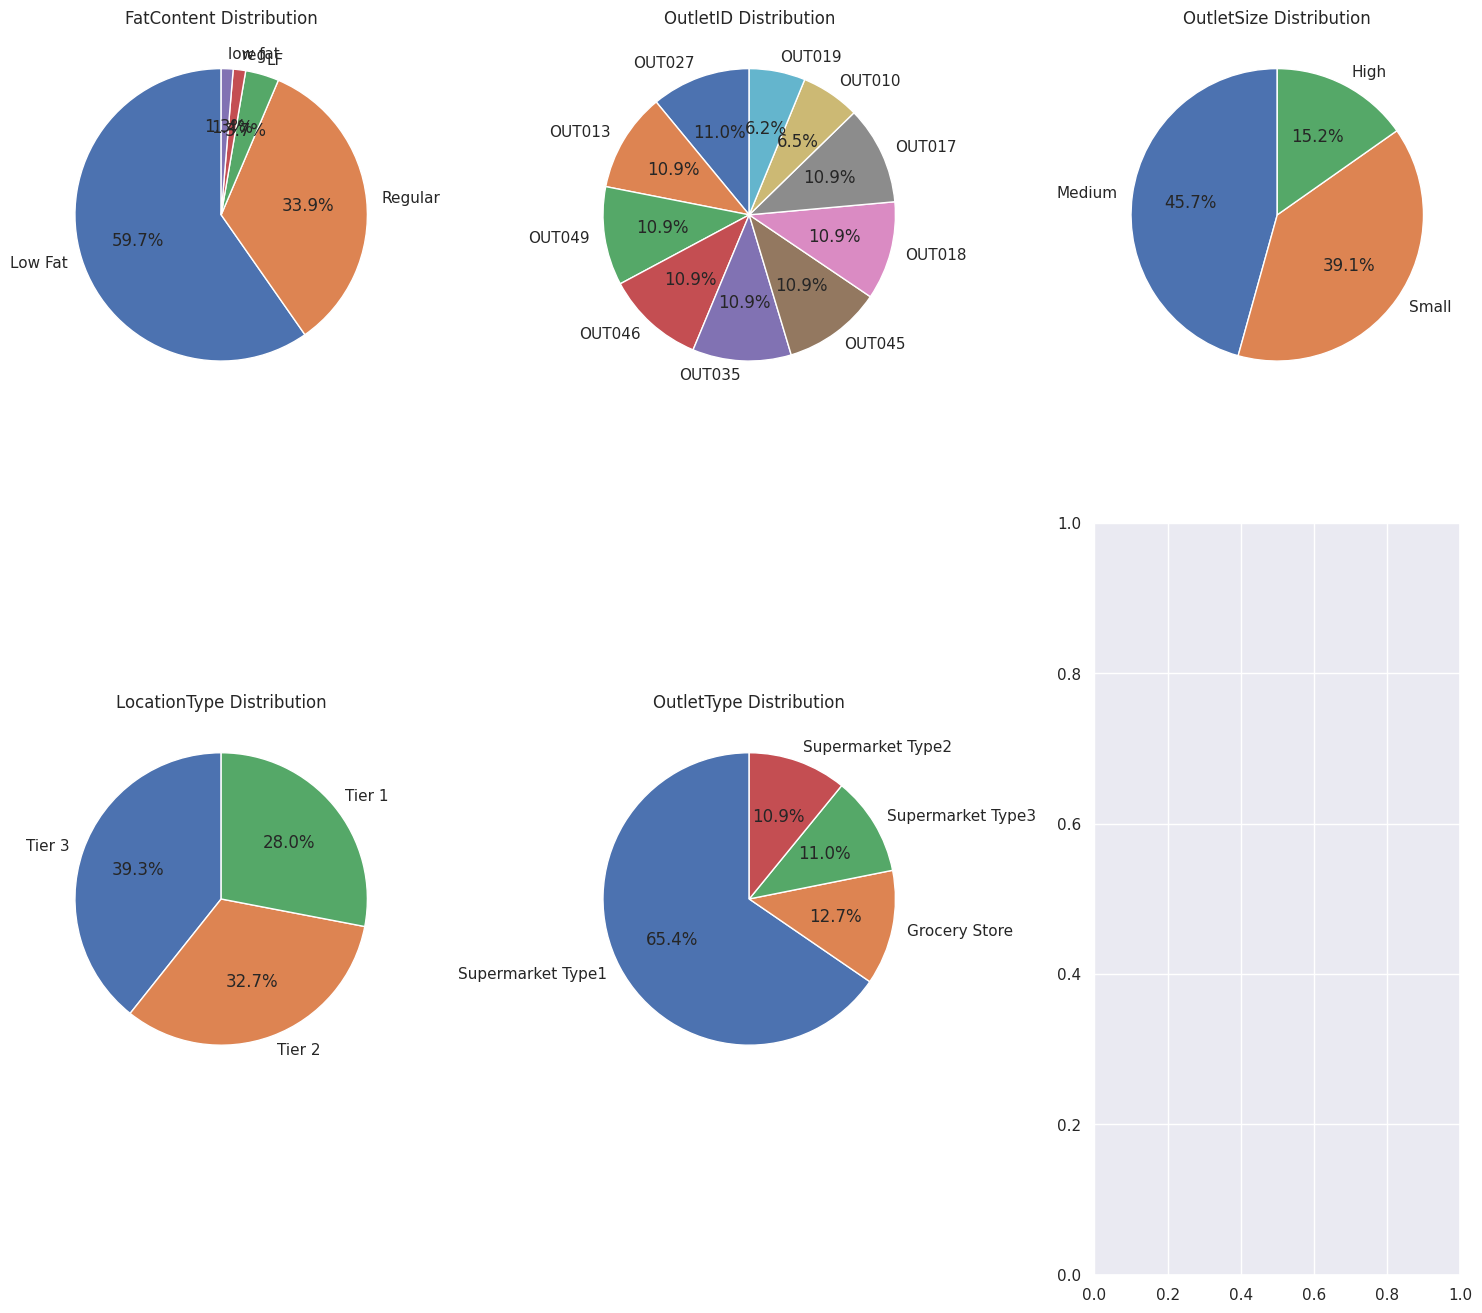

In [15]:
cat_vars = ['FatContent', 'OutletID', 'OutletSize', 'LocationType', 'OutletType']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()
for i, var in enumerate(cat_vars):
  if i < len(axs.flat):
    cat_counts = data[var].value_counts()
    axs.flat[i].pie(cat_counts, labels = cat_counts.index , autopct = '%1.1f%%', startangle = 90)
    axs.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()
fig.delaxes(axs[1][2])
plt.show()

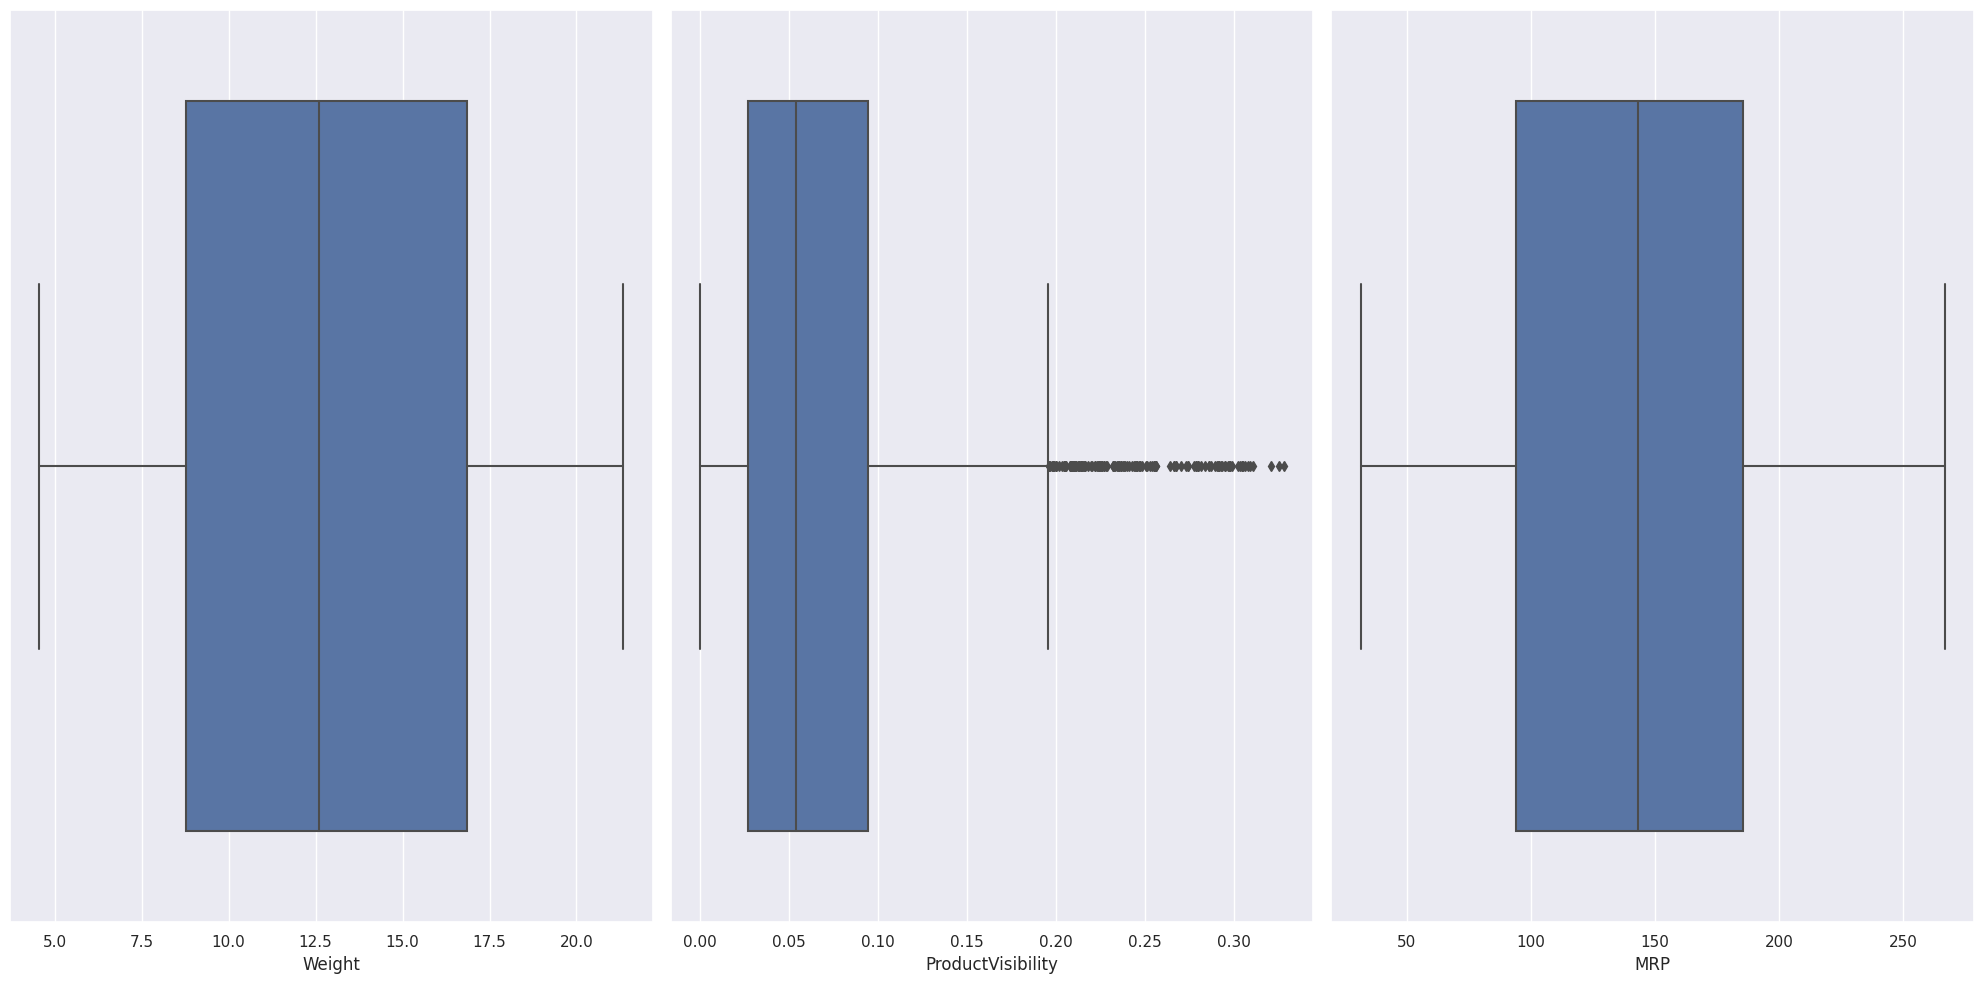

In [16]:
num_vars = ['Weight', 'ProductVisibility', 'MRP']
fig, axs = plt.subplots(nrows=1 , ncols=3, figsize=(20,10))
axs= axs.flatten()
for i, var in enumerate(num_vars):
  sns.boxplot(x=var, data= data, ax=axs[i])
fig.tight_layout()
plt.show()

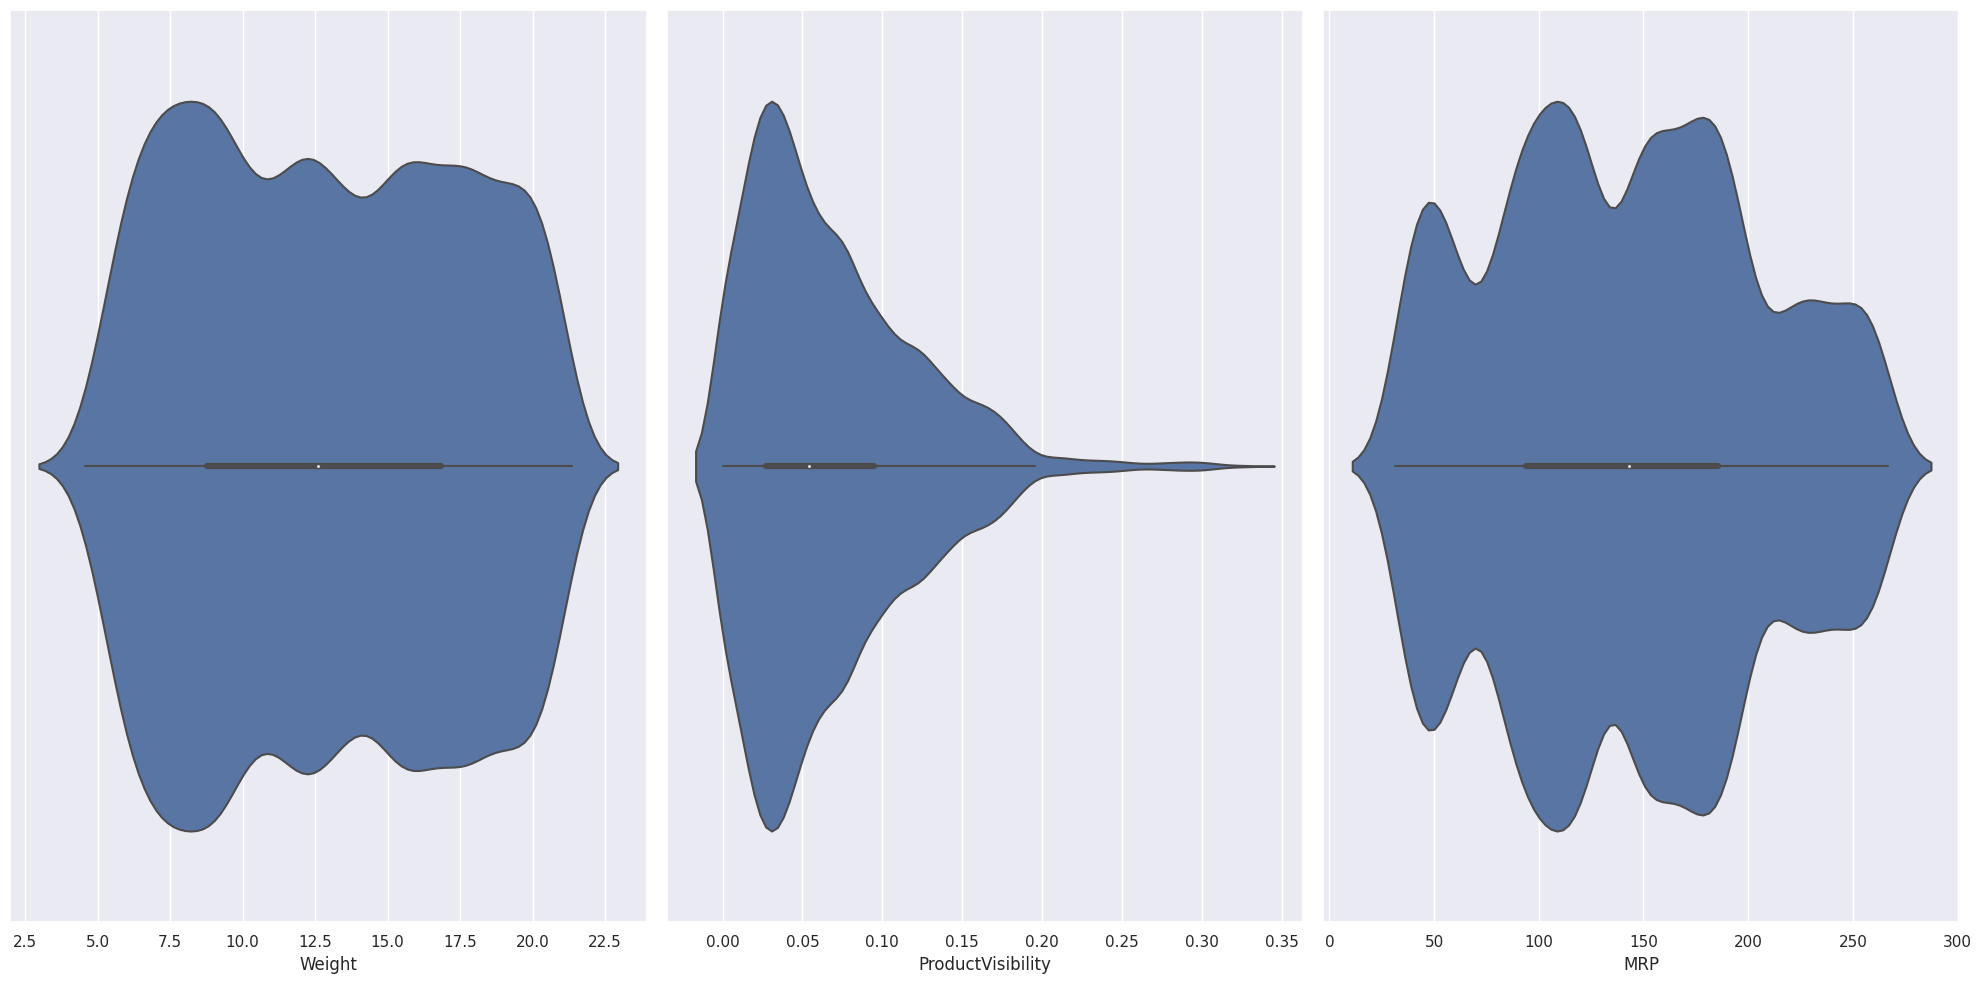

In [17]:
num_vars = ['Weight', 'ProductVisibility', 'MRP']
fig, axs = plt.subplots(nrows=1 , ncols=3, figsize=(20,10))
axs= axs.flatten()
for i, var in enumerate(num_vars):
  sns.violinplot(x=var, data= data, ax=axs[i])
fig.tight_layout()
plt.show()

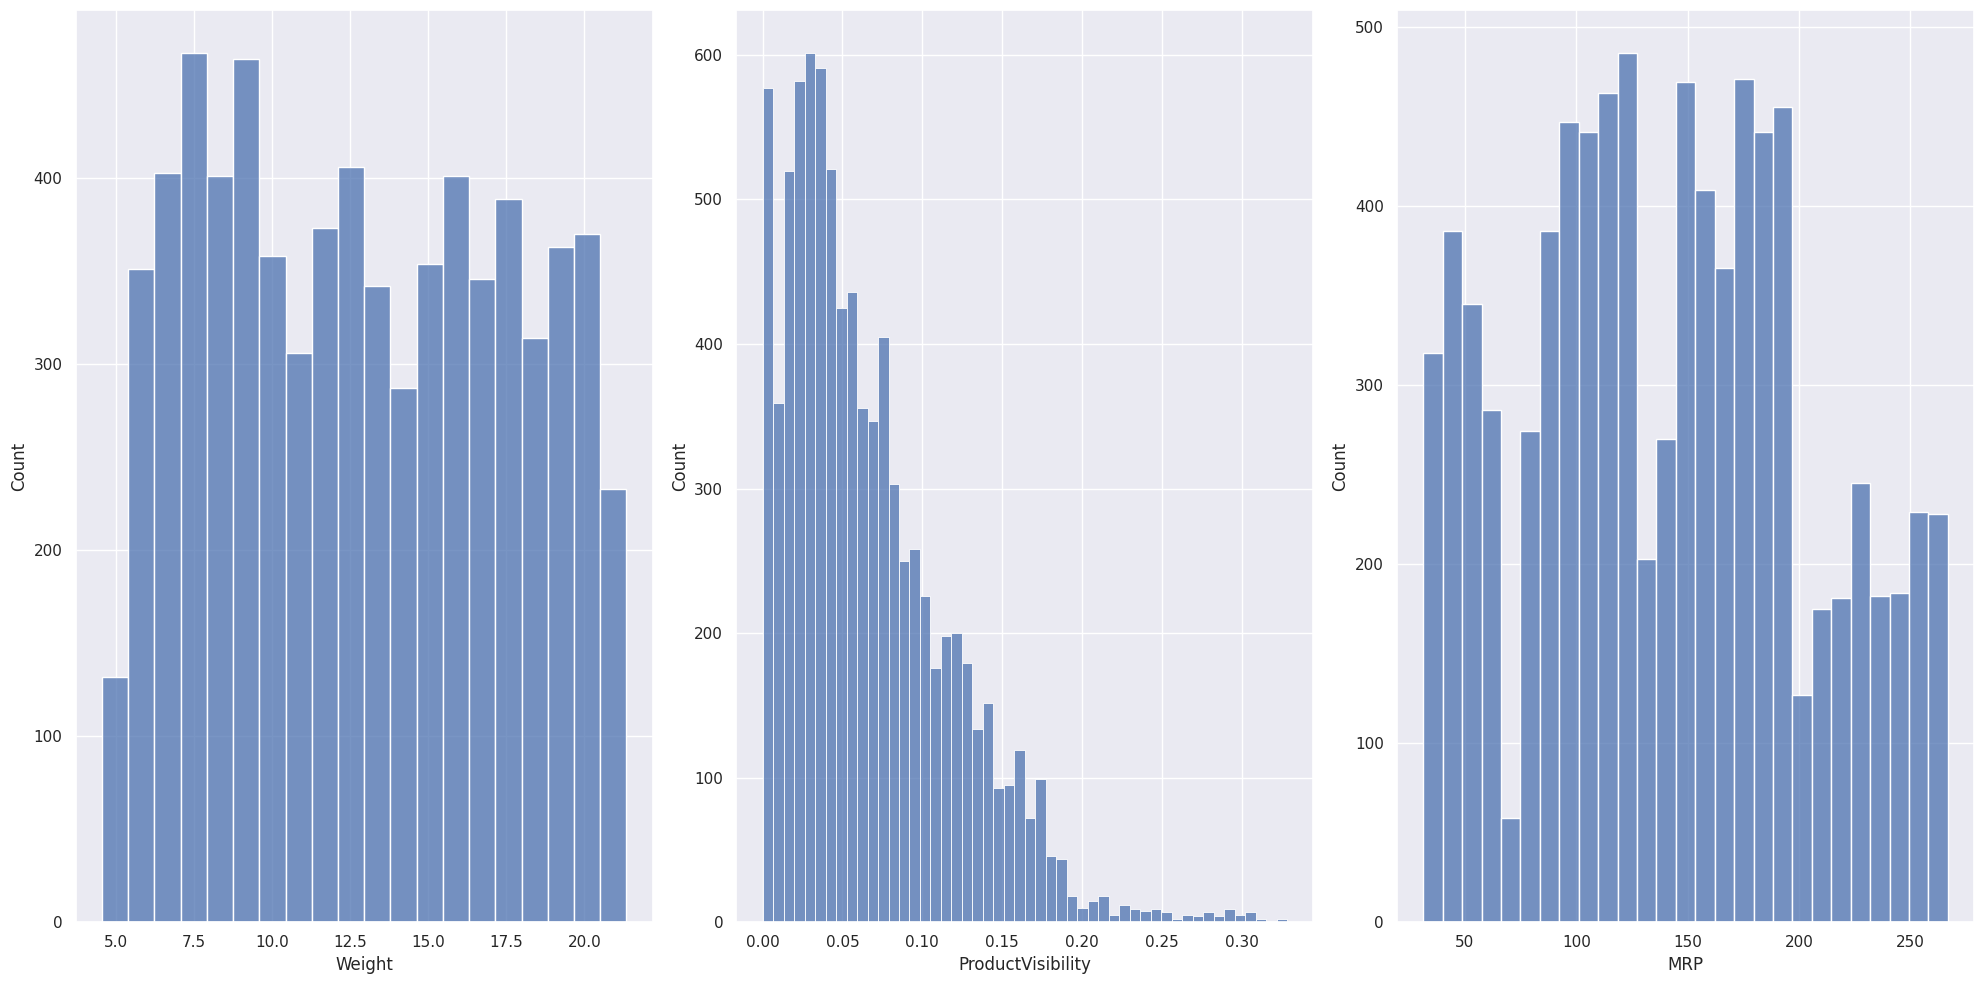

In [18]:
num_vars = ['Weight', 'ProductVisibility', 'MRP']
fig, axs = plt.subplots(nrows=1 , ncols=3, figsize=(20,10))
axs= axs.flatten()
for i, var in enumerate(num_vars):
  sns.histplot(x=var, data= data, ax=axs[i])
fig.tight_layout()
plt.show()

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

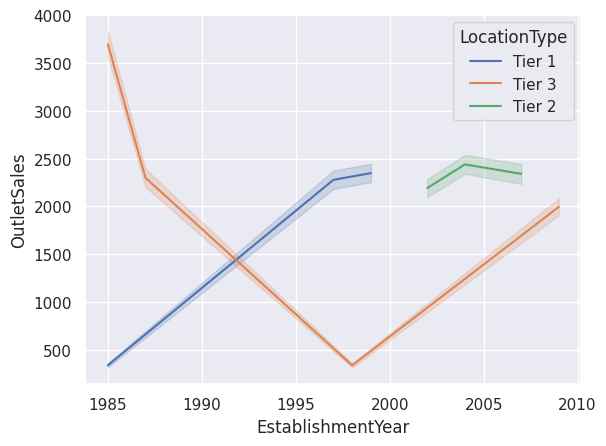

In [19]:
sns.lineplot(data=data, x='EstablishmentYear', y='OutletSales', hue='LocationType')

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

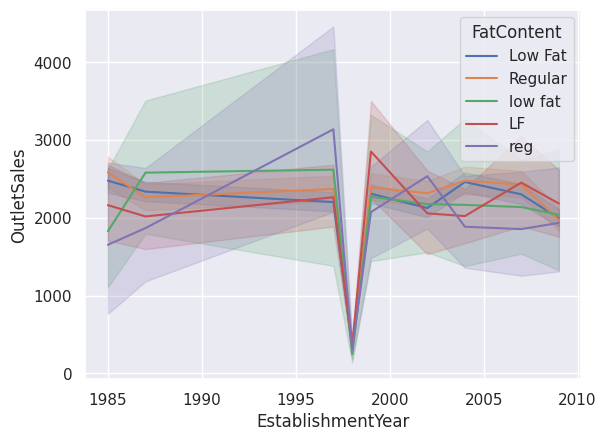

In [20]:
sns.lineplot(data=data, x='EstablishmentYear', y='OutletSales', hue='FatContent')

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

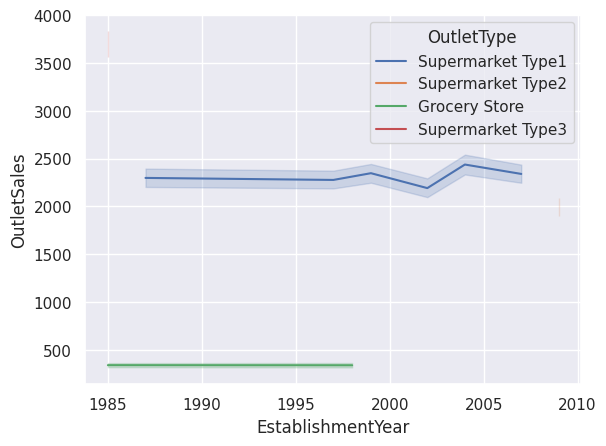

In [21]:
sns.lineplot(data=data, x="EstablishmentYear", y="OutletSales", hue="OutletType")

In [23]:
check_missing = data.isnull().sum()*100/data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

OutletSize    28.276428
Weight        17.165317
dtype: float64

In [25]:
data.shape

(8523, 11)

In [26]:
data['Weight']= data['Weight'].fillna(data['Weight'].mean())

In [27]:
unique_size_train3 = data.groupby('OutletType')['OutletSize'].unique()
unique_size_train3

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [28]:
data.loc[(data['OutletType'] == 'Grocery Store') & (data['OutletSize'].isna()), 'OutletSize']= 'Small'

In [29]:
check_missing = data.isnull().sum()*100/data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

OutletSize    21.764637
dtype: float64

In [30]:
data.dropna(subset=['OutletSize'], inplace=True)
data.shape

(6668, 11)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6668 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             6668 non-null   float64
 1   FatContent         6668 non-null   object 
 2   ProductVisibility  6668 non-null   float64
 3   ProductType        6668 non-null   object 
 4   MRP                6668 non-null   float64
 5   OutletID           6668 non-null   object 
 6   EstablishmentYear  6668 non-null   int64  
 7   OutletSize         6668 non-null   object 
 8   LocationType       6668 non-null   object 
 9   OutletType         6668 non-null   object 
 10  OutletSales        6668 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 625.1+ KB


In [32]:
data.dropna(subset=['OutletSize'], inplace=True)
data.shape

(6668, 11)

In [34]:
data.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
for col in data.select_dtypes(include=['object']).columns:
  print(f'{col}:{data[col].unique()}')

FatContent:['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
ProductType:['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Breakfast' 'Health and Hygiene'
 'Hard Drinks' 'Frozen Foods' 'Canned' 'Starchy Foods' 'Others' 'Breads'
 'Seafood']
OutletID:['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT046' 'OUT035' 'OUT019']
OutletSize:['Medium' 'Small' 'High']
LocationType:['Tier 1' 'Tier 3' 'Tier 2']
OutletType:['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [42]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
for col in data.select_dtypes(include=['object']).columns:
  label_enconder = preprocessing.LabelEncoder()
  label_enconder.fit(data[col].unique())
  data[col]= label_enconder.transform(data[col])
  print(f'{col}:{data[col].unique()}')

FatContent:[1 2 3 0 4]
ProductType:[ 4 14 10  6  9  0 13  2  8  7  5  3 15 11  1 12]
OutletID:[7 2 0 1 4 6 5 3]
OutletSize:[1 2 0]
LocationType:[0 2 1]
OutletType:[1 2 0 3]


In [46]:
column_names=['ProductVisibility']
for column_name in column_names:
  Q1= data[column_name].quantile(0.25)
  Q3= data[column_name].quantile(0.75)
  IQR = Q3-Q1
  data = data[~((data[column_name] < (Q1 - 1.5 * IQR)) | (data[column_name] > (Q3 + 1.5 * IQR)))]
data.head()



,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,1,0.016047,4,249.8092,7,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,7,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [48]:
data.shape

(6535, 11)

<Axes: >

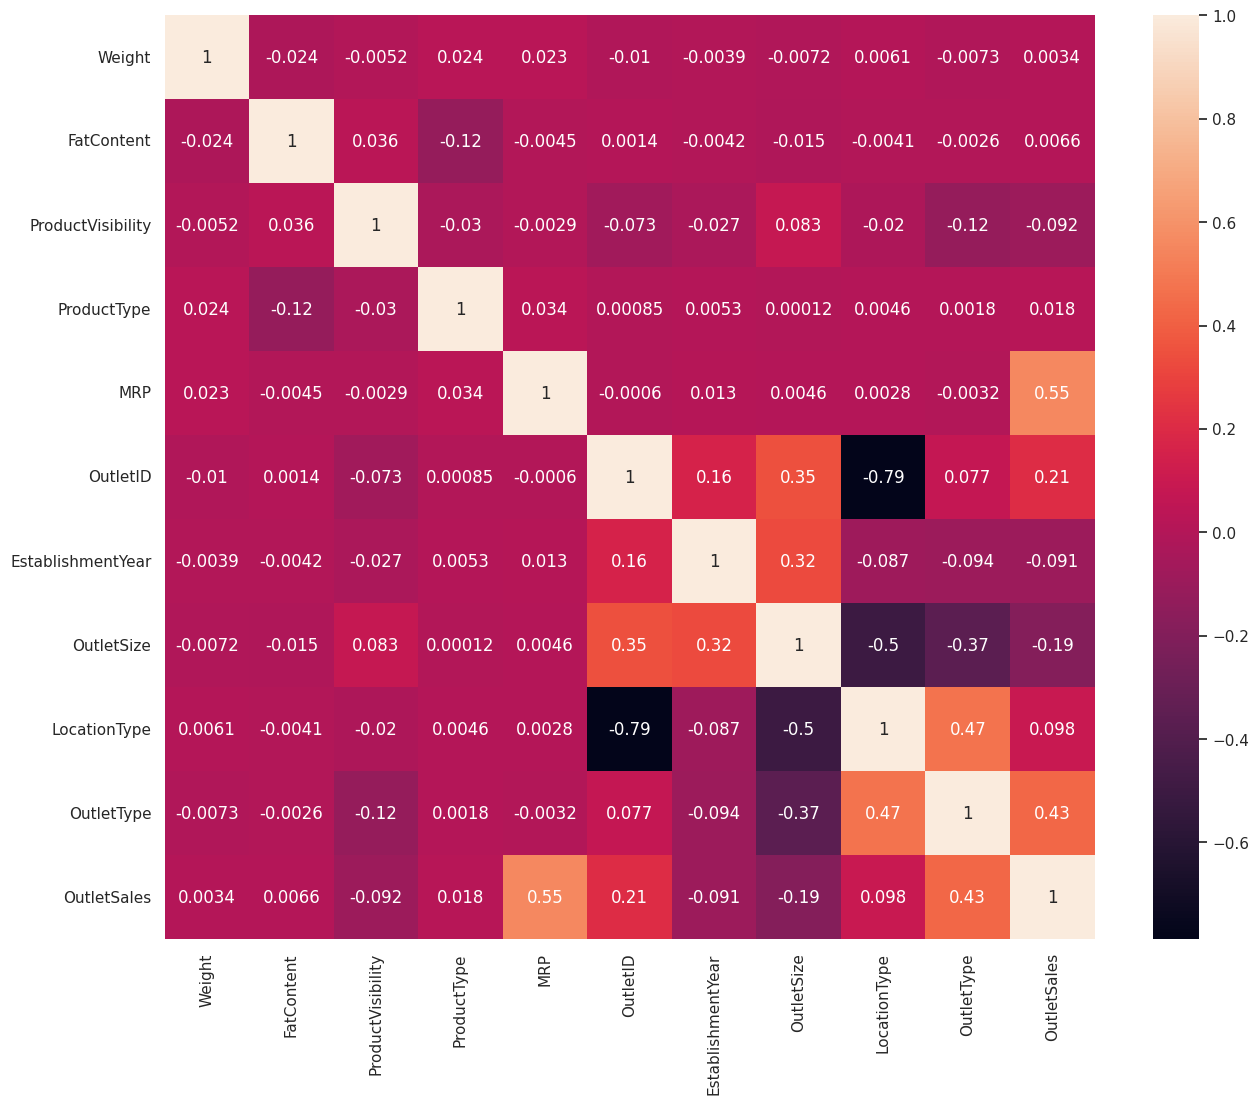

In [49]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), fmt='.2g', annot=True)

In [50]:
X = data.drop('OutletSales', axis=1)
y= data['OutletSales']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

#Machine learning Models


##1)Decision tree model


###hypermeter tunning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeRegressor()
param_grid = { 'max_depth':[2,4,6,8], 'min_samples_split':[2,4,6,8], 'min_samples_leaf':[1,2,3,4], 'max_features': ['auto','sqrt','log2'], 'random_state':[0,42]} 
grid_search = GridSearchCV( dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [53]:
print(grid_search.best_params_)

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


###Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=6, max_features='auto', min_samples_leaf=4, min_samples_split=2)
dtree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=4,
                      random_state=0)

In [55]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_percentage_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.5784403446838259
MAPE is 0.5784403446838259
MSE is 1245334.0275746458
R2 score is 0.6233611975537985
RMSE score is 1115.945351518006


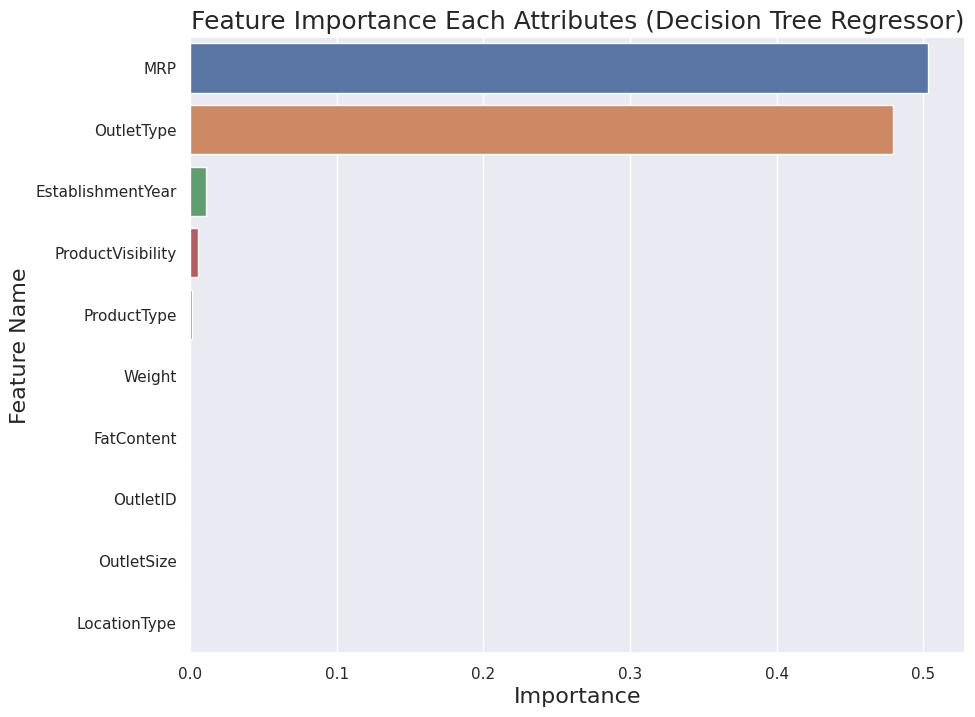

In [56]:
imp_df = pd.DataFrame({'Feature Name': X_train.columns , 'Importance': dtree.feature_importances_})
fi = imp_df.sort_values(by='Importance', ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data= fi2 , x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

In [ ]:
!pip install shap

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


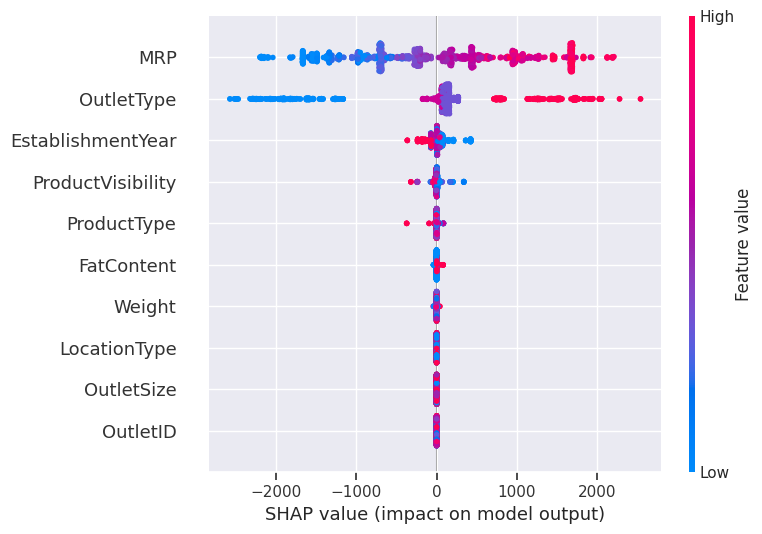

In [58]:
import shap 
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

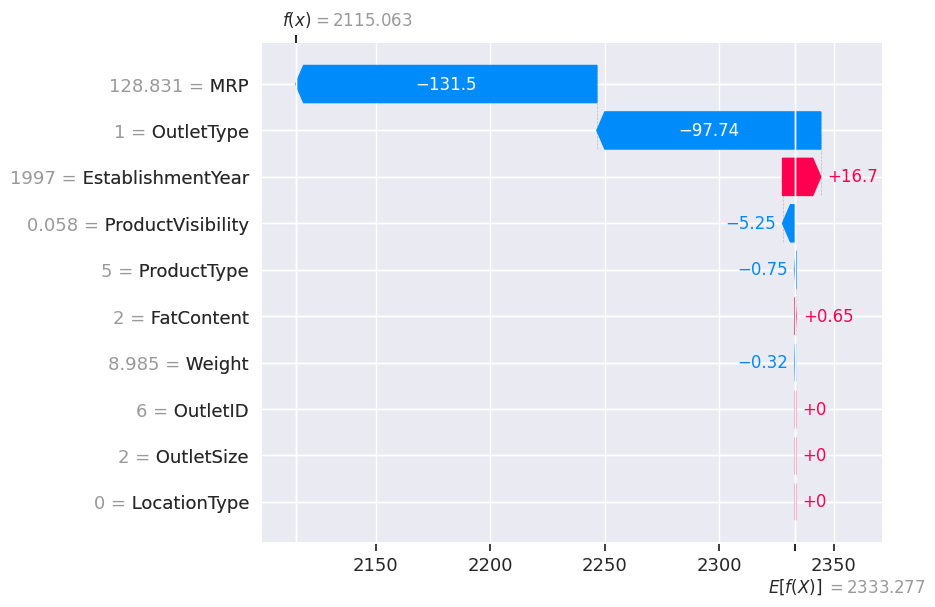

In [59]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

##2)Random Forest Model


###hypermeter tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
param_grid = { 'max_depth':[3,5,7,9], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4], 'max_features': ['auto','sqrt'], 'random_state':[0,42]} 
grid_search = GridSearchCV( rf, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [61]:
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 42}


###Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=4, max_features='auto')
rf.fit(X_train, y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, random_state=42)

In [63]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 752.6781314608743
MAPE is 0.57825002351114
MSE is 1196648.4804014838
R2 score is 0.6380856536255961
RMSE score is 1093.9142929871077


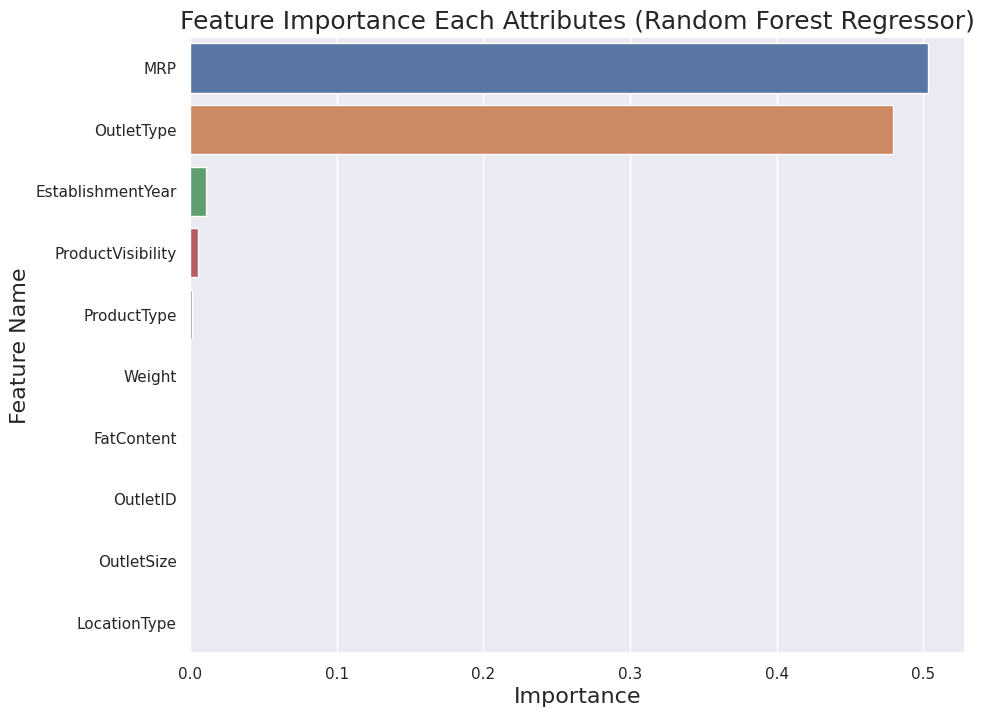

In [64]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


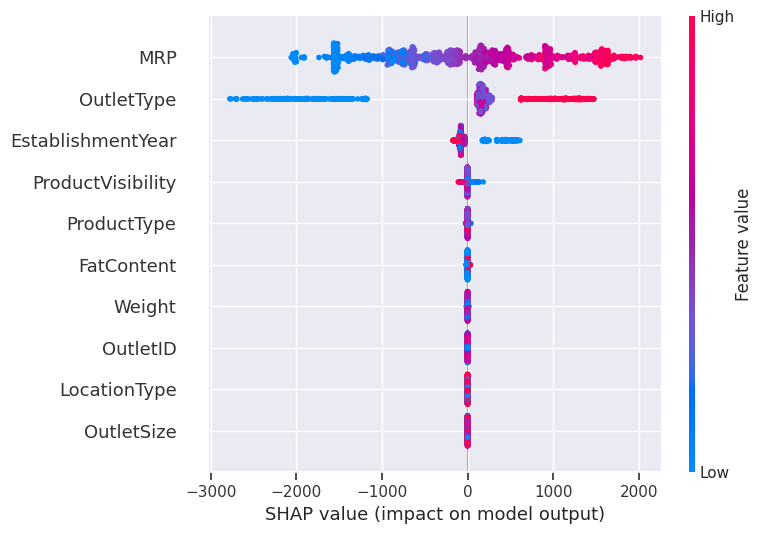

In [65]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

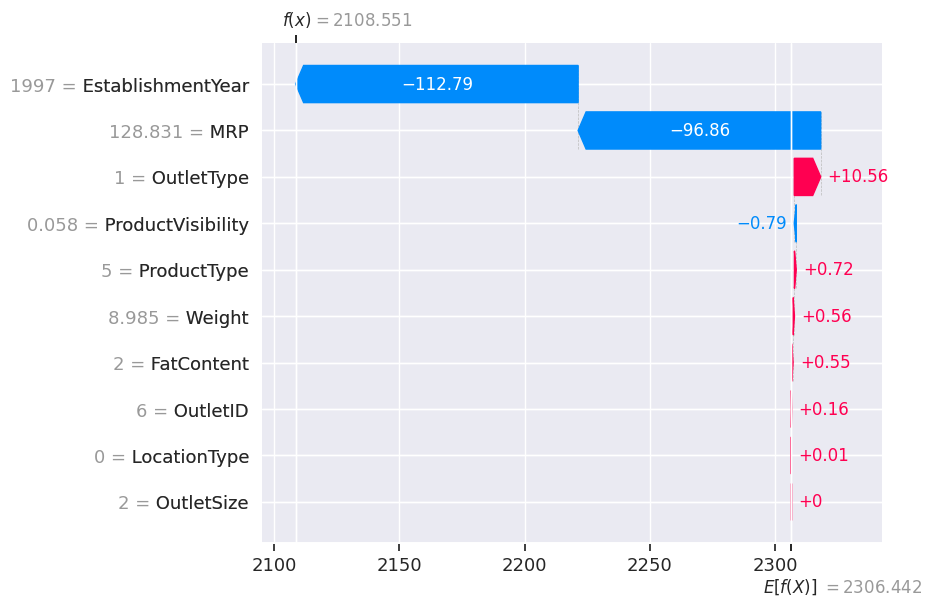

In [66]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

##3) XGBOOST model


### Hypermeter tuning

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()
param_grid = { 'max_depth':[3,5,7,9], 'min_child_weigth':[1,3,5], 'learning_rate':[0.1,0.01,0.001], 'gamma': [0,1,5]} 
grid_search = GridSearchCV( xgb, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [72]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weigth': 1}


###XGBoost

In [73]:
xgb = XGBRegressor(max_depth=3, min_child_weight=1, learning_rate=0.1, gamma=0)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [75]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = xgb.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 754.4837491406836
MAPE is 0.5890650529183769
MSE is 1196676.6797329972
R2 score is 0.6380771250202455
RMSE score is 1093.9271820980578


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


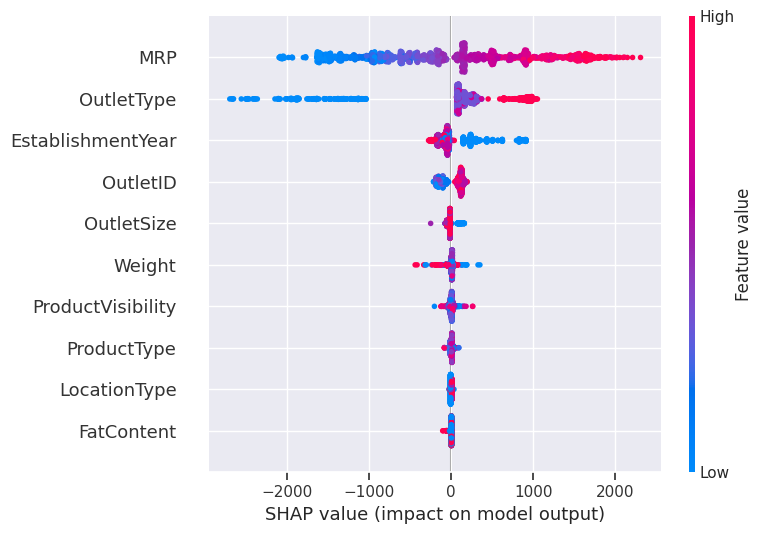

In [76]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

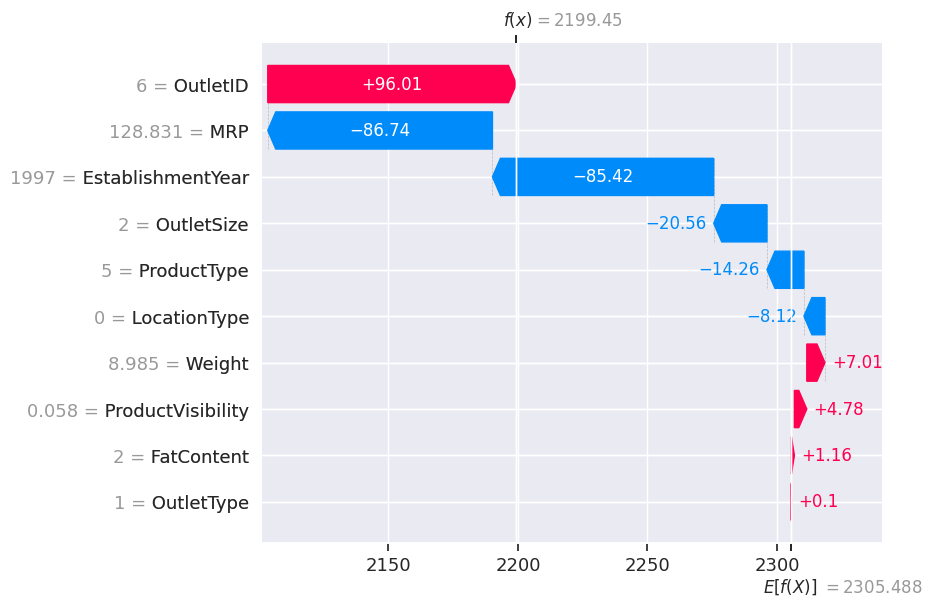

In [77]:
explainer = shap.Explainer(xgb, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])